In [244]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as pm
import matplotlib.pyplot as plt

In [200]:
data = pd.read_csv("adult.csv")
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [201]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [202]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [203]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [229]:
ar = pd.DataFrame(data).to_numpy()
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,0,-1.067997,11,-0.420060,6,0,1,4,0,-0.14592,10.593507,-0.035429,39,<=50K
1,3.183112,4,-0.539169,11,-0.420060,6,4,1,4,0,-0.14592,10.593507,-1.817204,39,<=50K
2,2.010110,0,-0.035220,15,-0.031360,6,0,4,2,0,-0.14592,10.593507,-0.035429,39,<=50K
3,1.130359,4,-0.468215,5,-2.363558,0,7,4,4,0,-0.14592,9.461864,-0.035429,39,<=50K
4,0.177296,4,0.709482,15,-0.031360,5,10,3,4,0,-0.14592,9.461864,-0.035429,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,4,1.140460,15,-0.031360,4,11,1,4,1,-0.14592,-0.216660,-0.035429,39,<=50K
32557,-0.849080,4,0.639741,7,0.746039,2,13,5,4,0,-0.14592,-0.216660,-0.197409,39,<=50K
32558,0.103983,4,-0.335433,11,-0.420060,2,7,0,4,1,-0.14592,-0.216660,-0.035429,39,>50K
32559,1.423610,4,-0.358777,11,-0.420060,6,1,4,4,0,-0.14592,-0.216660,-0.035429,39,<=50K


In [205]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
num_cols = data.columns[data.dtypes.apply(lambda c: np.issubdtype(c,np.number))]

data[num_cols] = scalar.fit_transform(data[num_cols])
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,?,-1.067997,HS-grad,-0.420060,Widowed,?,Not-in-family,White,Female,-0.14592,10.593507,-0.035429,United-States,<=50K
1,3.183112,Private,-0.539169,HS-grad,-0.420060,Widowed,Exec-managerial,Not-in-family,White,Female,-0.14592,10.593507,-1.817204,United-States,<=50K
2,2.010110,?,-0.035220,Some-college,-0.031360,Widowed,?,Unmarried,Black,Female,-0.14592,10.593507,-0.035429,United-States,<=50K
3,1.130359,Private,-0.468215,7th-8th,-2.363558,Divorced,Machine-op-inspct,Unmarried,White,Female,-0.14592,9.461864,-0.035429,United-States,<=50K
4,0.177296,Private,0.709482,Some-college,-0.031360,Separated,Prof-specialty,Own-child,White,Female,-0.14592,9.461864,-0.035429,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.215643,Private,1.140460,Some-college,-0.031360,Never-married,Protective-serv,Not-in-family,White,Male,-0.14592,-0.216660,-0.035429,United-States,<=50K
32557,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.14592,-0.216660,-0.197409,United-States,<=50K
32558,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.14592,-0.216660,-0.035429,United-States,>50K
32559,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.14592,-0.216660,-0.035429,United-States,<=50K


In [234]:
for col in str_df_list:
    lbl.fit(data[col])
    data[col] = lbl.transform(data[col])
data.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
count,3.256100e+04,32561.000000,3.256100e+04,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000
mean,1.150437e-15,3.868892,-9.112602e-17,10.298210,4.055804e-17,2.611836,6.572740,1.446362,3.665858,0.669205,4.823609e-14,-1.257938e-13,-3.437842e-15,36.718866
std,1.000015e+00,1.455960,1.000015e+00,3.870264,1.000015e+00,1.506222,4.228857,1.606771,0.848806,0.470506,1.000015e+00,1.000015e+00,1.000015e+00,7.823782
min,-1.582206e+00,0.000000,-1.681631e+00,0.000000,-3.529656e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.194030e+00,0.000000
25%,-7.757679e-01,4.000000,-6.816910e-01,9.000000,-4.200596e-01,2.000000,3.000000,0.000000,4.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,39.000000
50%,-1.159546e-01,4.000000,-1.082193e-01,11.000000,-3.136003e-02,2.000000,7.000000,1.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,39.000000
75%,6.904838e-01,4.000000,4.478765e-01,12.000000,7.460392e-01,4.000000,10.000000,3.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,3.695194e-01,39.000000
max,3.769612e+00,8.000000,1.226856e+01,15.000000,2.300838e+00,6.000000,14.000000,5.000000,4.000000,1.000000,1.339458e+01,1.059351e+01,4.742967e+00,41.000000


In [233]:
y_train

array([['<=50K'],
       ['<=50K'],
       ['<=50K'],
       ...,
       ['>50K'],
       ['<=50K'],
       ['>50K']], dtype=object)

In [236]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test = train_test_split(ar[:,:14],ar[:,14:],random_state=42)

lbl.fit(y_train)
y_train_encoded = lbl.transform(y_train)

lbl.fit(y_test)
y_test_encoded = lbl.transform(y_test)

X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state = 42)

lbl.fit(y_valid)
y_valid_encoded = lbl.transform(y_valid)

#y_valid = y_valid_encoded


In [228]:
X_train

array([[40, 'Private', 174515, ..., 0, 40, 'United-States'],
       [40, 'Private', 260696, ..., 0, 40, 'United-States'],
       [68, '?', 103161, ..., 0, 32, 'United-States'],
       ...,
       [47, 'Local-gov', 171095, ..., 0, 35, 'United-States'],
       [49, 'State-gov', 72619, ..., 0, 50, 'United-States'],
       [33, 'Federal-gov', 26543, ..., 0, 40, 'United-States']],
      dtype=object)

In [209]:
np.random.seed(42)
tf.set_random_seed(42)

In [225]:
X_train.shape[1:]
y_train.shape

(18315, 1)

In [211]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(14,activation="relu",input_shape = X_train.shape[1:]))
model.add(keras.layers.Dense(50,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [212]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_15 (Dense)             (None, 50)                750       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 51        
Total params: 1,011
Trainable params: 1,011
Non-trainable params: 0
_________________________________________________________________


In [213]:
model.compile(loss="binary_crossentropy", optimizer = "sgd", metrics = ['accuracy'])


In [214]:
str_df = data.select_dtypes(exclude=[np.number])
str_df = str_df.loc[:,'workclass':'native.country']
str_df_list = list(str_df.columns) 
str_df_list

[]

In [215]:
data[str_df_list]

""
0
1
2
3
4
...
32556
32557
32558
32559


In [216]:
for col in str_df_list:
    lbl.fit(data[col])
    data[col] = lbl.transform(data[col])
data.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
count,3.256100e+04,32561.000000,3.256100e+04,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000
mean,1.150437e-15,3.868892,-9.112602e-17,10.298210,4.055804e-17,2.611836,6.572740,1.446362,3.665858,0.669205,4.823609e-14,-1.257938e-13,-3.437842e-15,36.718866
std,1.000015e+00,1.455960,1.000015e+00,3.870264,1.000015e+00,1.506222,4.228857,1.606771,0.848806,0.470506,1.000015e+00,1.000015e+00,1.000015e+00,7.823782
min,-1.582206e+00,0.000000,-1.681631e+00,0.000000,-3.529656e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.194030e+00,0.000000
25%,-7.757679e-01,4.000000,-6.816910e-01,9.000000,-4.200596e-01,2.000000,3.000000,0.000000,4.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,39.000000
50%,-1.159546e-01,4.000000,-1.082193e-01,11.000000,-3.136003e-02,2.000000,7.000000,1.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,39.000000
75%,6.904838e-01,4.000000,4.478765e-01,12.000000,7.460392e-01,4.000000,10.000000,3.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,3.695194e-01,39.000000
max,3.769612e+00,8.000000,1.226856e+01,15.000000,2.300838e+00,6.000000,14.000000,5.000000,4.000000,1.000000,1.339458e+01,1.059351e+01,4.742967e+00,41.000000


In [217]:
y_train_encoded.shape

(24420,)

In [254]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best.h5",save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [256]:
model_history = model.fit(X_train,y_train_encoded,epochs = 200,validation_data = (X_valid,y_valid_encoded),callbacks = [checkpoint_cb,early_stopping_cb])

Train on 18315 samples, validate on 6105 samples
Epoch 1/200
18315/18315 [==============================] - 1s 42us/sample - loss: 0.3348 - acc: 0.8403 - val_loss: 0.3401 - val_acc: 0.8364
Epoch 2/200
18315/18315 [==============================] - 1s 42us/sample - loss: 0.3350 - acc: 0.8402 - val_loss: 0.3223 - val_acc: 0.8491
Epoch 3/200
18315/18315 [==============================] - 1s 42us/sample - loss: 0.3338 - acc: 0.8422 - val_loss: 0.3213 - val_acc: 0.8539
Epoch 4/200
18315/18315 [==============================] - 1s 42us/sample - loss: 0.3335 - acc: 0.8414 - val_loss: 0.3320 - val_acc: 0.8485
Epoch 5/200
18315/18315 [==============================] - 1s 42us/sample - loss: 0.3338 - acc: 0.8408 - val_loss: 0.3232 - val_acc: 0.8508
Epoch 6/200
18315/18315 [==============================] - 1s 42us/sample - loss: 0.3326 - acc: 0.8432 - val_loss: 0.3344 - val_acc: 0.8450
Epoch 7/200
18315/18315 [==============================] - 1s 42us/sample - loss: 0.3336 - acc: 0.8420 - val_lo

In [257]:
model_history.params

{'batch_size': 32,
 'epochs': 200,
 'steps': None,
 'samples': 18315,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [258]:
model_history.history

{'loss': [0.334776846772818,
  0.334980433202981,
  0.3337639200575131,
  0.3335476197540321,
  0.33380340612181997,
  0.3325631800682012,
  0.3336195216066942,
  0.3326862030762517,
  0.33346899567553817,
  0.33501641676948596,
  0.3334926628721499,
  0.33258295495621404,
  0.3321060195618108,
  0.33102836705136096,
  0.3314444310607202,
  0.33092080979375865,
  0.33267214222583097,
  0.3309026781958763,
  0.3305026873763129,
  0.3312983122380939,
  0.3319241260675957,
  0.33314747965355374,
  0.3304821565116718,
  0.3301829187841712,
  0.33128493338082937,
  0.33041139968978295,
  0.32984012191921447,
  0.3307166312631284,
  0.33089941909102966,
  0.3289925355208952,
  0.3290353270443352,
  0.3304544586831678,
  0.3297474671884407,
  0.3293139779914314],
 'acc': [0.84029484,
  0.84018564,
  0.8421512,
  0.84138685,
  0.8408408,
  0.84318864,
  0.842042,
  0.84176904,
  0.84045863,
  0.840677,
  0.84095,
  0.84133226,
  0.84176904,
  0.84428066,
  0.84122306,
  0.84160525,
  0.8427518

NameError: name 'plot' is not defined

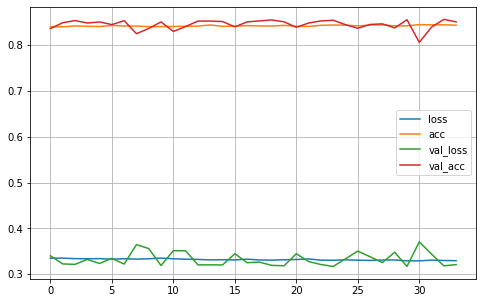

In [259]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plot.gca().set_ylim(0,1)
plt.show()

In [260]:
model.evaluate(X_test,y_test_encoded)

8141/8141 [==============================] - 0s 20us/sample - loss: 0.3299 - acc: 0.8461


[0.3298918788401739, 0.8460877]

In [261]:
model.save("Best1.h5")